## Title: Logistic Classifiers (Logistic Regression)
#### Name: Sunmi Kim
#### Date: 05/25/2023

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

## Step 1: Collect and Explore Data

- Data linked and located now at /kaggle/input/imdb-chapter-6/IMDB_Dataset.csv

In [3]:
import re
import os
import nltk
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Step 2: Data Preparation and Exploration

- Data preparation involves cleaning, filtering, inputing, scaling, encoding, and splitting the data.
- Data exploration involves understanding patterns, identifying problems and resolving, visualizing, summarizing, testing and modeling

In [4]:
# function that cleans the text removing stop words: a, an, the, as, is, to, in, on, or, it, and
def clean_text(text):
    text = re.sub(r'<.*?>', '', text) # remove html tags
    text = re.sub(r'[^\w\s]', ' ', text) # replace comma, ending periods to a space
    text = re.sub(r'\bthe\b', '', text) # remove 'the'
    text = re.sub(r'\b(?:an|An|a|A)\b', '', text) # remove 'an', 'An', 'a', 'A'
    text = re.sub(r'\b(?:as|is|to|in)\b', '', text) # remove 'as', 'is', 'to', 'in'
    text = re.sub(r'\b(?:on|or|it|and)\b', '', text) # remove 'on', 'or', 'it', 'and'
    text = text.lower() # make strings lower case
    text = re.sub('  ', ' ', text) # remove extra space 1
    text = re.sub('  ', ' ', text) # remove extra space 2
    return text 

# Cohen's D
def cohen_d(group1, group2):
    '''the function calculates the effect size of the statistical difference 
    in the word count between positive and negative reviews'''
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled_var = (n1*var1 + n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [5]:
# sentiment analysis based on nltk library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

def review_nltk(df):
    score = sia.polarity_scores(df)
    # extract the emotion score, which ranges from -1 to 1
    emotion_score = score['compound']
    # classify the sentiment as positive or neutral
    if emotion_score > 0:
        sentiment = 'Positive'        
    else:
        sentiment = 'Negative'
    return sentiment 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
# review based on nltk library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

def score_nltk(df):
    # use the polarity_scores() method to get a sentiment score
    score = sia.polarity_scores(df)
    # extract the emotion score, which ranges from -1 to 1
    emotion_score = score['compound']
    return emotion_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
path = '/kaggle/input/imdb-chapter-6/IMDB_Dataset.csv'
df = pd.read_csv(path)
# apply the cleaning function to the review column
df['review_cleaned'] = df['review'].apply(lambda x: clean_text(x))
# count the words in the reviews and add a column to the dataframe
df['word_count'] = df['review_cleaned'].apply(lambda x: len(str(x).split(" ")))
# word_count is now done based on 'review_cleaned' not 'review'
# sentiment analysis review based on NLTK library
df['sentiment_nltk'] = df['review_cleaned'].apply(lambda x: review_nltk(x))
# sentiment score based on cleaned reviews using NLTK library
df['sentiment_score'] = df['review_cleaned'].apply(lambda x: score_nltk(x))
df.head(5)

,review,sentiment,review_cleaned,word_count,sentiment_nltk,sentiment_score
0,One of the other reviewers has mentioned that ...,positive,one of other reviewers has mentioned that afte...,259,Negative,-0.9948
1,A wonderful little production. <br /><br />The...,positive,wonderful little production the filming techn...,130,Positive,0.9579
2,I thought this was a wonderful way to spend ti...,positive,i thought this was wonderful way spend time to...,137,Positive,0.9713
3,Basically there's a family where a little boy ...,negative,basically there s family where little boy jake...,110,Negative,-0.8858
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love time of money visually st...,177,Positive,0.9766


In [8]:
df.info # 50000 rows 6 columns (review, sentiment, review_cleaned, word_count, sentiment_nltk, sentiment_score)

<bound method DataFrame.info of                                                   review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
49995  I thought this movie did a down right good job...  positive   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  I am a Catholic taught in parochial elementary...  negative   
49998  I'm going to have to disagree with the previou...  negative   
49999  No one expects the Star Trek movies to be high...  negative   

                                          review_cleaned  word_count  \
0      one of other reviewers has mentioned that afte..

In [9]:
# check to see if there is a difference in the mean word count between positive and negative reviews
#df.groupby('sentiment_nltk')['word_count'].mean() # 199 (Negative) 189 (Positive) 143 (Neutral)
df.groupby('sentiment_nltk')['word_count'].max() # 1769 (Negative) 2007 (Positive) 848 (Neutral)
#df.groupby('sentiment_nltk')['word_count'].min() # 5 (Negative) 10 (Positive) 9 (Neutral)

sentiment_nltk
Negative    1769
Positive    2007
Name: word_count, dtype: int64

In [10]:
unique_sentiments = df['sentiment_nltk'].unique()
print(unique_sentiments) # positive negative neutral

['Negative' 'Positive']


In [11]:
# If word_count > 1769 positive review rate 100% 
length_over_1769_p = df[(df['word_count'] > 1769) & (df['sentiment'] == 'positive')]
print(length_over_1769_p) # 2 rows

#length_over_1769_n = df[(df['word_count'] > 1769) & (df['sentiment'] == 'negative')]
#print(length_over_1769_n) # 0 rows

                                                  review sentiment  \
31481  Match 1: Tag Team Table Match Bubba Ray and Sp...  positive   
40521  There's a sign on The Lost Highway that says:<...  positive   

                                          review_cleaned  word_count  \
31481  match 1 tag team table match bubba ray spike d...        2007   
40521  there s sign the lost highway that says major ...        1831   

      sentiment_nltk  sentiment_score  
31481       Positive           0.9989  
40521       Positive           0.9964  


In [12]:
df.shape # (50000 rows, 6 columns)

(50000, 6)

In [13]:
# positive review rate = 50% using sentiment column
positive_review = len(df[df['sentiment'] == 'positive'])
print(positive_review) # 25000 rows

negative_review = len(df[df['sentiment'] == 'negative'])
print(negative_review) # 25000 rows

25000
25000


In [14]:
# positive review rate using sentiment_nltk column
positive_review = len(df[df['sentiment_nltk'] == 'Positive'])
positive_rate = round((positive_review * 100) / 50000, 1)
print(f"Positive rows: {positive_review} ({positive_rate}%)") # 33225 rows

# negative review rate using sentiment_nltk column
negative_review = len(df[df['sentiment_nltk'] == 'Negative'])
negative_rate = round((negative_review * 100) / 50000, 1)
print(f"Negative rows: {negative_review} ({negative_rate}%)") # 16775 rows

Positive rows: 33225 (66.5%)
Negative rows: 16775 (33.5%)


In [15]:
# do a t-test to see if there is a statistical difference in the word count between positive and negative reviews
stats.ttest_ind(df[df['sentiment_nltk']=='Positive']['word_count'], df[df['sentiment_nltk']=='Negative']['word_count'], equal_var=False)
# a p-value < 0.05 indicates that there is a statistical difference in the word count between positive and negative reviews
# using sentiment column: Ttest_indResult(statistic=1.6414947183288393, pvalue=0.10070108220393838)
# using sentment_nltk:   Ttest_indResult(statistic=-6.850336105729239, pvalue=7.500670220804805e-12)

Ttest_indResult(statistic=-6.850336105729239, pvalue=7.500670220804805e-12)

In [16]:
# test the effect size of the difference in the word count between positive and negative reviews. 
cohen_d(df[df['sentiment_nltk']=='Positive']['word_count'], df[df['sentiment_nltk']=='Negative']['word_count'])
# a cohen's d of 0.15 indicates a small effect size
# using sentiment column: 0.014681975099560618
# using sentiment_nltk: -0.06608806059609376

-0.06608806059609376

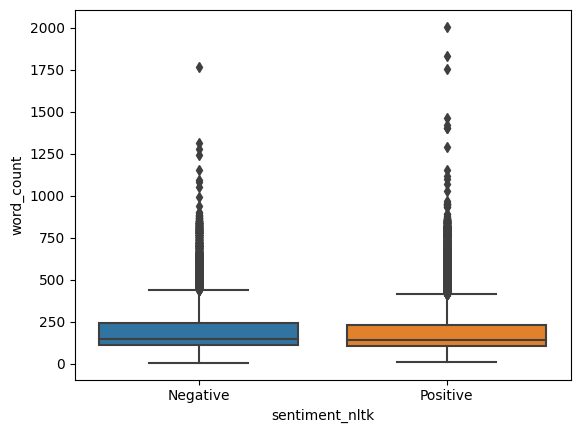

In [17]:
# do a boxplot to see if there is a statistical difference in the word count between positive and negative reviews
sns.boxplot(x='sentiment_nltk', y='word_count', data=df)
plt.show()

In [18]:
# use sklearn to split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review_cleaned'], df['sentiment_nltk'], test_size=0.2, random_state=42)

In [19]:
# use sklearn to transform the text into a vector
countvectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=5000)
# fit and transform the training data
countvectorizer.fit(X_train)
X_train = countvectorizer.transform(X_train)
# transform the test data
X_test = countvectorizer.transform(X_test)

In [20]:
# create a logistic regression model
logreg = LogisticRegression(solver='liblinear') # have to use liblinear solver because of the large dataset
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [21]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2563  750]
 [ 669 6018]]
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78      3313
    Positive       0.89      0.90      0.89      6687

    accuracy                           0.86     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.86      0.86      0.86     10000

0.8581


## Step 3: Working with your model

A. Exploration: Search for and create a list of at least (1) 5 high ranked positive words and (2) 5 high ranked negative words. Create code blocks that clearly indicate a list of these words and their weights.

In [22]:
# Sort the data by sentiment_score in descending order
sorted_data = df.sort_values('sentiment_score', ascending=False)

# Get the top 5 positive scores and their corresponding reviews
top_positive_scores = sorted_data.head(5)[['sentiment_score', 'review_cleaned', 'sentiment_nltk']]

# # Sort the data by sentiment_score in ascending order
sorted_data = df.sort_values('sentiment_score', ascending=True)

# # Get the top 5 negative scores and their corresponding reviews
top_negative_scores = sorted_data.head(5)[['sentiment_score', 'review_cleaned', 'sentiment_nltk']]

# Print the results
print("Top 5 positive scores:")
print(top_positive_scores)

print("\nTop 5 negative scores:")
print(top_negative_scores)

Top 5 positive scores:
       sentiment_score                                     review_cleaned  \
42946           0.9999  by now you ve probably heard bit about new dis...   
16498           0.9998  the quintessential georgian film of georgi dan...   
38816           0.9998  this awesome amicus horror anthology with 3 gr...   
28525           0.9998  jim carrey back much same role that he played ...   
30324           0.9998  i had lost faith sooraj r barjatya after movie...   

      sentiment_nltk  
42946       Positive  
16498       Positive  
38816       Positive  
28525       Positive  
30324       Positive  

Top 5 negative scores:
       sentiment_score                                     review_cleaned  \
45221          -0.9997   nobi fires on plain film that so excellent so...   
4447           -0.9997  i m going write about this movie about irrever...   
7602           -0.9997  the bone collector set new york city starts on...   
38418          -0.9996  this movie was so ba

B. Preparation - Remove at least 5 words from the dataset that are clearly stop words (ex: "the"). Create a code blocks that clearly demonstrate that these words have been removed. Also, explain why these words have been chosen. 5 stop words, the, a/A, an/An, on, or are removed. 'the' is removed whereas 'The' is not removed here though it will be switched to lower case eventually. I chose these words as most troubling words in processing data.  

In [23]:
# Already removed from step 2 above
# function that cleans the text removing stop words: a, an, the, as, is, to, in, on, or, it, and
def clean_text(text):
    text = re.sub(r'<.*?>', '', text) # remove html tags
    text = re.sub(r'[^\w\s]', ' ', text) # replace comma, ending periods to a space
    text = re.sub(r'\bthe\b', '', text) # remove 'the'
    text = re.sub(r'\b(?:an|An|a|A)\b', '', text) # remove 'an', 'An', 'a', 'A'
    text = re.sub(r'\b(?:as|is|to|in)\b', '', text) # remove 'as', 'is', 'to', 'in'
    text = re.sub(r'\b(?:on|or|it|and)\b', '', text) # remove 'on', 'or', 'it', 'and'
    text = text.lower() # make strings lower case
    text = re.sub('  ', ' ', text) # remove extra space 1
    text = re.sub('  ', ' ', text) # remove extra space 2
    return text 

C. Recreate a model using new variables:   
- Split the data into training/testing data using either 80/20 or 75/25 splits
- Train the new model
- Evaluate the testing data for accuracy. How did your model perform? 

In [24]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = df["review_cleaned"]
y = df["sentiment_nltk"]

# Split the data into training and testing sets using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# create a TF-IDF vectorizer
tfidfvectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=5000)

# fit and transform the training data
X_train = tfidfvectorizer.fit_transform(X_train)

# transform the test data
X_test = tfidfvectorizer.transform(X_test)

# create a logistic regression model
logreg = LogisticRegression(solver='liblinear')  # have to use liblinear solver because of the large dataset
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2419  894]
 [ 464 6223]]
              precision    recall  f1-score   support

    Negative       0.84      0.73      0.78      3313
    Positive       0.87      0.93      0.90      6687

    accuracy                           0.86     10000
   macro avg       0.86      0.83      0.84     10000
weighted avg       0.86      0.86      0.86     10000

0.8642


D. Identify the top 2 most positive reviews and the top 2 most negative reviews. Print out the entire text of each review. 

In [26]:
# Sort the data by sentiment_score in descending order
sorted_data = df.sort_values('sentiment_score', ascending=False)
# Set the display options to show the entire text of the review column
pd.set_option('display.max_colwidth', None)
# Get the top 2 positive scores and their corresponding reviews
top_2_positive_reviews = sorted_data.head(2)[['review_cleaned','sentiment_nltk','sentiment_score']]

print("Top 2 positive reviews:\n")
#print(top_2_positive_reviews) # # since this fails to display the 2nd row of 'review_cleaned' need to iterrate below
for _, row in top_2_positive_reviews.iterrows():
    print("Review:", row['review_cleaned'])
    print("Sentiment:", row['sentiment_nltk'])
    print("Score:", row['sentiment_score'])
    print()

# Sort the data by sentiment_score in ascending order
sorted_data = df.sort_values('sentiment_score', ascending=True)
# Set the display options to show the entire text of the review column
pd.set_option('display.max_colwidth', None)
# Get the top 2 negative scores and their corresponding reviews
top_2_negative_reviews = sorted_data.head(2)[['review_cleaned','sentiment_nltk','sentiment_score']]

print("Top 2 negative reviews:\n")
#print(top_2_negative_reviews) # since this fails to display the 2nd row of 'review_cleaned' need to iterrate below
for _, row in top_2_negative_reviews.iterrows():
    print("Review:", row['review_cleaned'])
    print("Sentiment:", row['sentiment_nltk'])
    print("Score:", row['sentiment_score'])
    print()


Top 2 positive reviews:

Review: by now you ve probably heard bit about new disney dub of miyazaki s classic film laputa castle in the sky during late summer of 1998 disney released kiki s delivery service video which included preview of laputa dub saying was due out 1999 it s obviously way past that year now but dub has been finally completed and s not laputa castle in the sky just castle in the sky for dub since laputa not such nice word spanish even though they use word laputa many times throughout dub you ve also probably heard that world renowned composer joe hisaishi who scored movie originally went back rescore excellent music with new arrangements laputa came out before my neighbor totoro after nausicaa of valley of wind which began studio ghibli s long string of hits and my opinion i think s one of miyazaki s best films with powerful lesson tuckered inside this two hour four minute gem laputa castle sky film for all ages i urge everyone see for those unfamiliar with castle sky